<a href="https://colab.research.google.com/github/surajjorwar/ml/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df =pd.read_csv('/content/drive/MyDrive/ml files/100-days-of-machine-learning-main/Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.shape

(400, 5)

In [6]:
#splitting data in to  input and output variable
x = df.iloc[:,2:-1].values
y=df.iloc[:,-1].values

In [7]:
x.shape

(400, 2)

In [8]:
y.shape

(400,)

In [9]:

#splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

In [10]:
X_train.shape


(320, 2)

In [11]:
Y_train.shape

(320,)

In [12]:
#data scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform (X_test)

In [14]:
#method 1 to  fimding k
np.sqrt(X_train.shape[0])

17.88854381999832

In [15]:
k= 17

In [16]:
#importing knn algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)

In [17]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=17)

In [18]:
y_pred = knn.predict(X_test)

In [19]:
#accuracy of model
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9375

In [20]:
#method 2 for fimding k
accuracy = []

for i in range (1,26):
  knn= KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train,Y_train)
  accuracy.append(accuracy_score(Y_test,knn.predict(X_test)))

In [21]:
len(accuracy)

25

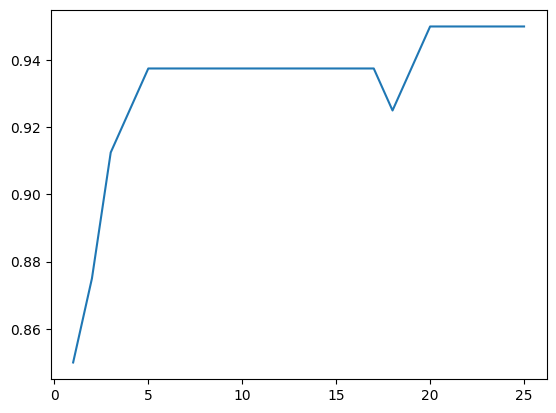

In [22]:
plt.plot(range(1,26),accuracy)

In [23]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.95

In [24]:
# function to take input and predict output
def  predict_output():
  age = int(input('enter the age '))
  salary = int(input('enter the salary '))

  x_new = np.array([[age],[salary]]).reshape(1,2)
  x_new = scaler.transform(x_new)

  if knn.predict(x_new)[0]==0:
    return "will not Purchase"

  else:

      return "Will Purchase"

In [25]:
predict_output()

enter the age 55
enter the salary 87654


'Will Purchase'